<a href="https://colab.research.google.com/github/Renad-CAI/T5_week3/blob/main/Lab_exam_3_Clustering_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


In [766]:
#Accident_Severity, Number_of_Vehicles, Number_of_Casualties, Date, Day_of_Week, Speed_limit, Weather_Conditions, Road_Surface_Conditions, Year, Urban_or_Rural_Area

## Import Libraries

In [767]:
import pandas as pd
import numpy as np

## Load the Data

In [768]:
df = pd.read_csv('/content/Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [769]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [770]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51912.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.359397,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479868,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


In [771]:
df.dtypes

,0
Location_Easting_OSGR,float64
Location_Northing_OSGR,float64
Longitude,float64
Latitude,float64
Police_Force,int64
Accident_Severity,float64
Number_of_Vehicles,int64
Number_of_Casualties,float64
Date,object
Day_of_Week,int64


In [772]:
df.shape

(52000, 26)

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [773]:
num_col = df.select_dtypes(include = ['number'])
num_col

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,6,556,3,22,70,-1,0,2.0,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,1,26,4,466,30,6,0,1.0,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,4,746,6,0,30,3,4055,1.0,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,7,84,6,0,30,6,0,1.0,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,3,257,6,0,30,-1,0,1.0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,6,365,3,607,30,6,6485,1.0,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,4,502,3,272,60,-1,0,2.0,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,3,516,5,85,40,6,0,1.0,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,6,323,5,81,30,5,81,1.0,2011


In [774]:
categorical_col = df.select_dtypes(include = ['object'])
categorical_col

,Date,Local_Authority_(Highway),Road_Type,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Did_Police_Officer_Attend_Scene_of_Accident
0,27/11/2009,E10000011,Dual carriageway,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),Yes
1,10/10/2010,E09000017,Single carriageway,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,Yes
2,14/09/2005,W06000014,Single carriageway,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Yes
3,18/08/2007,E10000017,One way street,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,Yes
4,06/08/2013,E06000021,Single carriageway,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Yes
...,...,...,...,...,...,...,...,...,...
51995,31/08/2012,E10000018,Single carriageway,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,Yes
51996,08/05/2013,E10000014,Single carriageway,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,Yes
51997,01/11/2011,E10000030,Single carriageway,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,Yes
51998,22/07/2011,E06000015,Single carriageway,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,Yes


In [775]:
df.duplicated().sum()

43

In [776]:
df = df.drop_duplicates()

In [777]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


In [778]:
df.sample(6)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
6838,523120.0,188180.0,-0.224551,51.578992,1,3.0,2,2.0,03/12/2006,1,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,No,2006
29609,497050.0,180090.0,-0.602884,51.511359,43,3.0,2,1.0,19/08/2012,1,...,6,7302,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,No,2012
31498,412951.0,272357.0,-1.811304,52.349100,23,3.0,1,2.0,11/10/2013,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2013
44198,251644.0,668426.0,-4.373550,55.886102,97,3.0,1,1.0,30/09/2013,2,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013
42724,496750.0,217140.0,-0.596950,51.844442,43,3.0,3,2.0,30/08/2006,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2006
18176,404680.0,289450.0,-1.932494,52.502901,20,3.0,1,1.0,29/06/2005,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,No,2005


In [779]:
df['Accident_Severity'] = df['Accident_Severity'].fillna(df['Accident_Severity'].mean())

In [780]:
df['Number_of_Casualties'] = df['Number_of_Casualties'].fillna(df['Number_of_Casualties'].mean())

In [781]:
df['Light_Conditions'] = df['Light_Conditions'].fillna('Unknown')

In [782]:
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mode()[0])

In [783]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0
Day_of_Week,0


In [784]:
df['Urban_or_Rural_Area'].unique()

array([2., 1., 3.])

In [785]:
corre_metrix = num_col.corr()
corre_metrix

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
Location_Easting_OSGR,1.000000,-0.426100,0.999358,-0.428100,-0.355791,0.011899,0.013283,-0.036557,-0.006266,-0.378165,-0.066523,-0.084217,-0.056254,0.045012,-0.003933,-0.087152,0.032600
Location_Northing_OSGR,-0.426100,1.000000,-0.436512,0.999974,0.176440,-0.030637,-0.041982,0.028132,0.001804,0.128939,0.036908,0.044823,0.045996,-0.034241,0.019856,0.050624,-0.011934
Longitude,0.999358,-0.436512,1.000000,-0.438409,-0.369331,0.012545,0.014655,-0.035299,-0.006195,-0.388518,-0.064988,-0.081901,-0.055575,0.045610,-0.002466,-0.085490,0.032355
Latitude,-0.428100,0.999974,-0.438409,1.000000,0.174347,-0.030641,-0.041782,0.028327,0.001804,0.127175,0.036912,0.045675,0.045712,-0.033955,0.020501,0.050162,-0.012018
Police_Force,-0.355791,0.176440,-0.369331,0.174347,1.000000,-0.033097,-0.015102,0.002525,0.004726,0.981991,0.047616,-0.006392,0.199189,-0.117069,-0.019011,0.237511,-0.031013
Accident_Severity,0.011899,-0.030637,0.012545,-0.030641,-0.033097,1.000000,0.079257,-0.100917,0.015712,-0.033040,0.019119,-0.010151,-0.074867,0.062850,0.024364,-0.080621,-0.007567
Number_of_Vehicles,0.013283,-0.041982,0.014655,-0.041782,-0.015102,0.079257,1.000000,0.267989,-0.005239,-0.009094,-0.139214,0.000460,0.080439,0.067722,0.027258,0.038217,-0.008036
Number_of_Casualties,-0.036557,0.028132,-0.035299,0.028327,0.002525,-0.100917,0.267989,1.000000,0.003392,0.010768,-0.082221,0.008200,0.140630,-0.032779,0.002640,0.118086,-0.014588
Day_of_Week,-0.006266,0.001804,-0.006195,0.001804,0.004726,0.015712,-0.005239,0.003392,1.000000,0.004856,0.008415,0.002395,-0.015010,0.003579,0.002457,-0.015958,-0.000973
Local_Authority_(District),-0.378165,0.128939,-0.388518,0.127175,0.981991,-0.033040,-0.009094,0.010768,0.004856,1.000000,0.058510,0.005139,0.205801,-0.116678,-0.017620,0.251190,-0.035152


In [786]:
!pip install feature_engine

In [787]:

from feature_engine.outliers import OutlierTrimmer

trimmer = OutlierTrimmer(capping_method= 'gaussian', tail= 'both')
df_no_outliers = trimmer.fit_transform(df)

<Axes: xlabel='Urban_or_Rural_Area', ylabel='Speed_limit'>

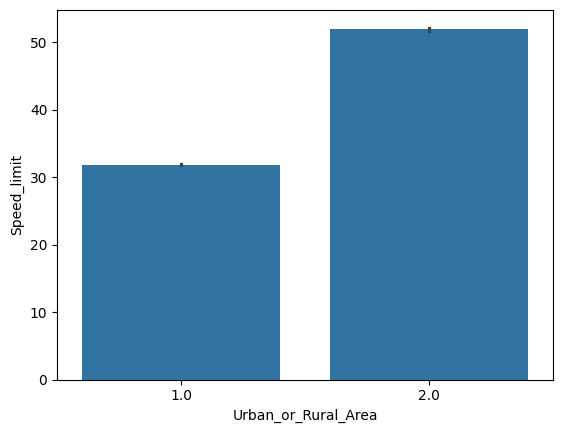

In [788]:
sns.barplot(data= df_no_outliers, x= df_no_outliers['Urban_or_Rural_Area'], y= df_no_outliers['Speed_limit'])

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [789]:
#Accident_Severity, Number_of_Vehicles, Number_of_Casualties, Date, Day_of_Week, Speed_limit, Weather_Conditions, Road_Surface_Conditions, Year, Urban_or_Rural_Area

In [790]:
X_df = df_no_outliers[['Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'Speed_limit', 'Weather_Conditions', 'Road_Surface_Conditions', 'Year', 'Urban_or_Rural_Area']]

In [791]:
X_df.select_dtypes(include = ['object'])

,Weather_Conditions,Road_Surface_Conditions
0,Raining with high winds,Flood (Over 3cm of water)
1,Fine without high winds,Dry
2,Fine without high winds,Dry
3,Raining without high winds,Wet/Damp
4,Fine without high winds,Dry
...,...,...
51994,Fine without high winds,Dry
51996,Fine without high winds,Dry
51997,Raining without high winds,Wet/Damp
51998,Raining without high winds,Wet/Damp


In [792]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded_data_Weather = encoder.fit_transform(X_df[['Weather_Conditions']])
encoded_data_df_Weather = pd.DataFrame(encoded_data_Weather.toarray(), columns= encoder.get_feature_names_out(['Weather_Conditions']))
encoded_data_road = encoder.fit_transform(X_df[['Road_Surface_Conditions']])
encoded_data_df_road = pd.DataFrame(encoded_data_road.toarray(), columns= encoder.get_feature_names_out(['Road_Surface_Conditions']))

df = pd.concat([encoded_data_df_Weather,encoded_data_df_road, X_df], axis= 1).drop(columns=['Weather_Conditions', 'Road_Surface_Conditions'])

In [793]:
df

,Weather_Conditions_Fine with high winds,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown,Road_Surface_Conditions_Dry,...,Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Normal,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Speed_limit,Year,Urban_or_Rural_Area
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,1.0,1.0,70.0,2009.0,2.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,3.0,2.0,1.0,30.0,2010.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,3.0,2.0,1.0,30.0,2005.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3.0,1.0,2.0,30.0,2007.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,3.0,2.0,2.0,30.0,2013.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,2.0,2.0,30.0,2012.0,2.0
51996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,1.0,1.0,60.0,2013.0,2.0
51997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,3.0,1.0,40.0,2011.0,1.0
51998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,2.0,2.0,30.0,2011.0,1.0


In [794]:
X = df.dropna()

In [795]:
X

,Weather_Conditions_Fine with high winds,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown,Road_Surface_Conditions_Dry,...,Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Normal,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Speed_limit,Year,Urban_or_Rural_Area
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,1.0,1.0,70.0,2009.0,2.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,3.0,2.0,1.0,30.0,2010.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,3.0,2.0,1.0,30.0,2005.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3.0,1.0,2.0,30.0,2007.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,3.0,2.0,2.0,30.0,2013.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46821,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,3.0,1.0,1.0,60.0,2009.0,2.0
46822,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,3.0,2.0,1.0,30.0,2012.0,1.0
46823,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3.0,1.0,1.0,30.0,2012.0,1.0
46824,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3.0,1.0,2.0,30.0,2009.0,1.0


In [796]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

In [797]:
X_sc

array([[-0.10547242, -2.01792926, -0.07290902, ...,  2.20431764,
        -0.13821214,  1.36746326],
       [-0.10547242,  0.49555751, -0.07290902, ..., -0.62972944,
         0.19384658, -0.73128107],
       [-0.10547242,  0.49555751, -0.07290902, ..., -0.62972944,
        -1.46644702, -0.73128107],
       ...,
       [-0.10547242, -2.01792926, -0.07290902, ..., -0.62972944,
         0.85796402, -0.73128107],
       [-0.10547242, -2.01792926, -0.07290902, ..., -0.62972944,
        -0.13821214, -0.73128107],
       [-0.10547242,  0.49555751, -0.07290902, ..., -0.62972944,
         0.85796402, -0.73128107]])

In [798]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2, random_state= 0)
X_pca = pca.fit_transform(X_sc)

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

Text(0.5, 1.0, 'The Relationships Between Varibles')

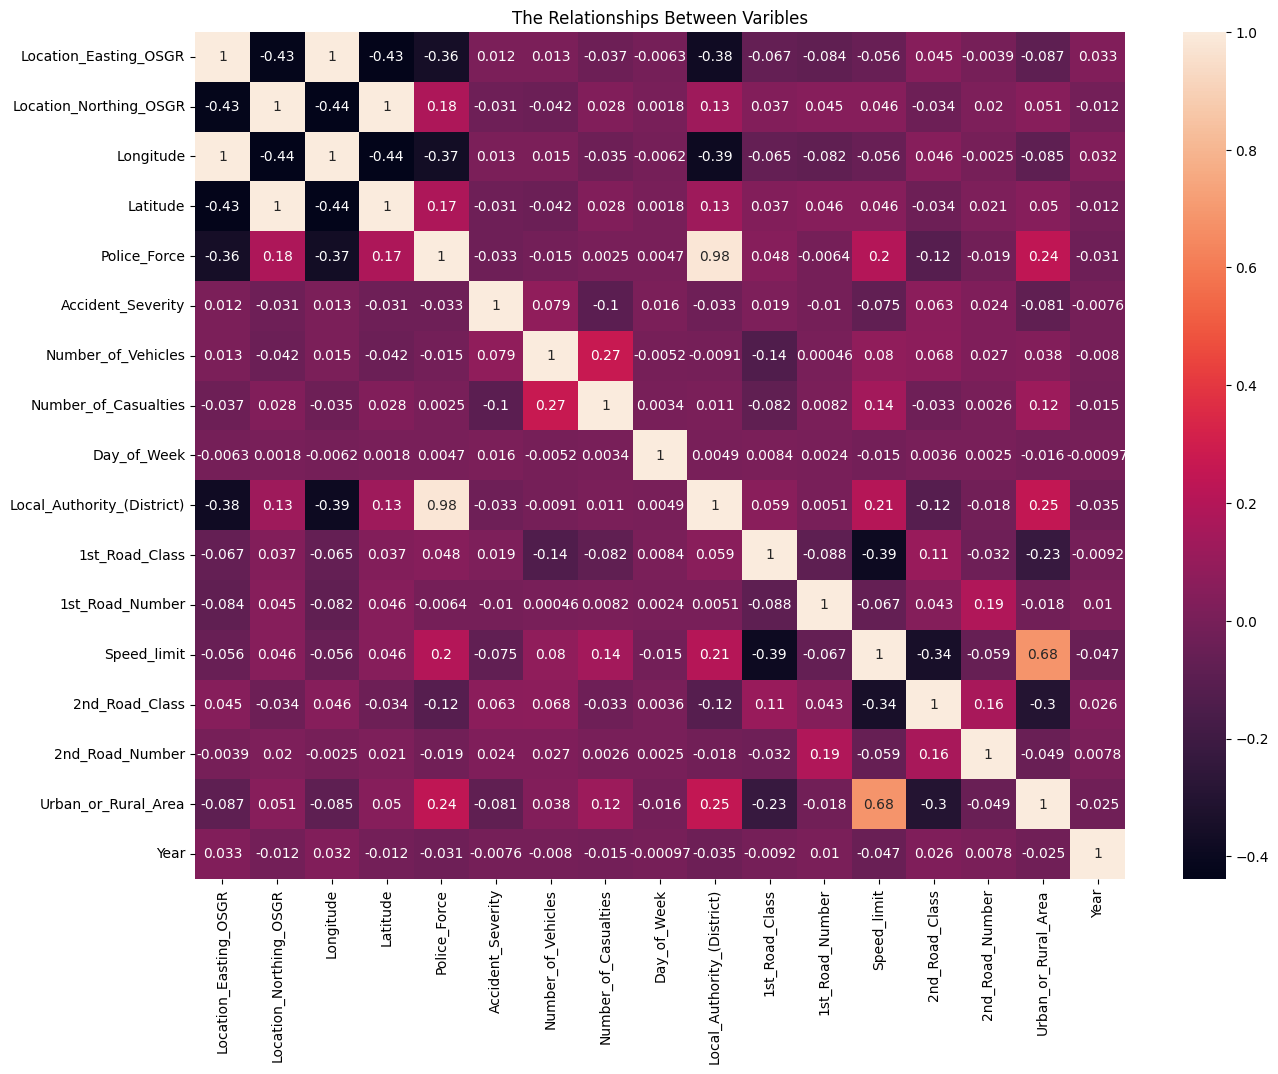

In [799]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize= (15,11))
sns.heatmap(data= corre_metrix, annot= True)
plt.title('The Relationships Between Varibles')

Text(0, 0.5, 'Number of accsedints')

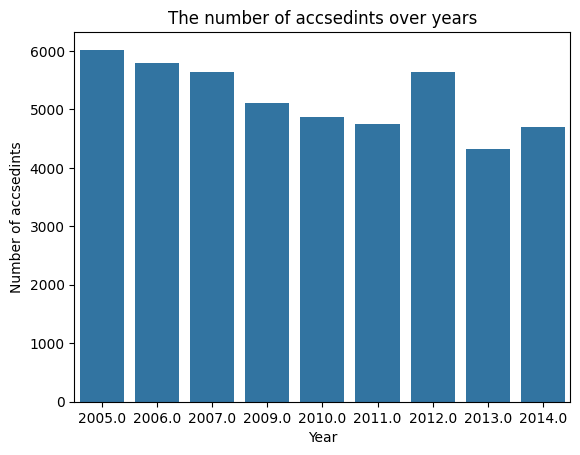

In [800]:
sns.countplot(data = df, x= df['Year'])
plt.title('The number of accsedints over years')
plt.ylabel('Number of accsedints')

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [801]:
from sklearn.cluster import KMeans

inertia = []

for k in range(1,16):
  kmeans = KMeans(n_clusters= k, random_state= 0)
  kmeans.fit_predict(X_pca)
  inertia.append(kmeans.inertia_)

print(inertia)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  self._algorithm = self.algorithm
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  self._algorithm = self.algorithm
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  self._algorithm = self.algorithm
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  self._algorithm = self.al

[203976.14915783043, 96087.80429580857, 53351.38993039607, 35026.851293875516, 24059.97141842513, 17684.91533148222, 13198.197090078123, 8739.955327561947, 7605.924454286756, 6534.361619028528, 5567.893103941237, 4809.456143549495, 4310.180831938753, 3895.5001129529837, 3613.997444966167]


Text(0.5, 1.0, 'Finding The Optimal Number of K clusters Using elbow method')

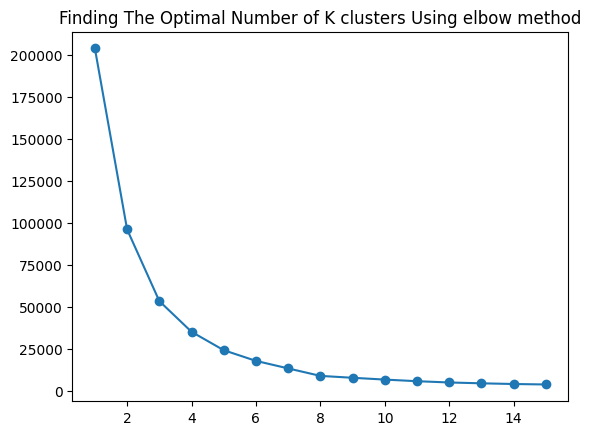

In [802]:
plt.plot(range(1,16), inertia, marker= 'o')
plt.title('Finding The Optimal Number of K clusters Using elbow method')

In [803]:
# From the elbow method we can see the optimal number of clusters is: 4 clusters

In [804]:
kmeans = KMeans(n_clusters= 4)
clusters = kmeans.fit_predict(X_pca)
centers = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  self._algorithm = self.algorithm


## Evaluation
Evaluate the clustering result using appropriate metrics.


In [805]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_pca, clusters)
print(score)

0.6361779342549897


## Plot the data points with their predicted cluster center

Text(0, 0.5, 'PCA 2')

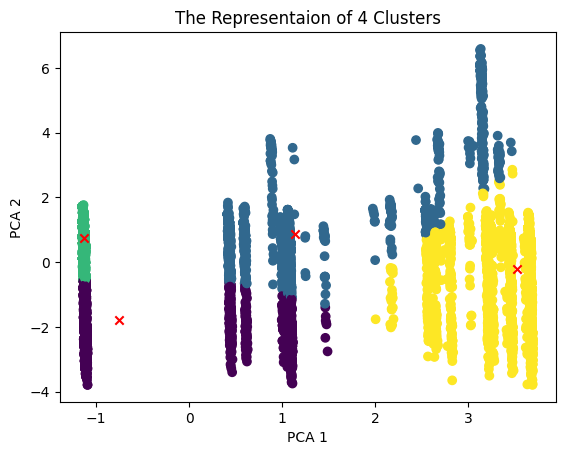

In [806]:
plt.title('The Representaion of 4 Clusters')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clusters, marker= 'o')
plt.scatter(centers[:, 0], centers[:, 1], c= 'red', marker= 'x')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

Q1: I choose these fetures: Accident_Severity, Number_of_Vehicles, Number_of_Casualties, Speed_limit, Weather_Conditions, Road_Surface_Conditions, Year and Urban_or_Rural_Area

All of these are playing crtical things for clustring task

Q2: I detremine the optimal number of clusters by using elbow method

Q3: I choose the silhouette_score metraix, for each point it calculate how this point belongs to its cluster or class, and when the result colser to 1 it indicate the point is in the right cluster and its cluster is right

Q4: I think if we try to more feture enginnering, this will affetc posotivly to the model and the clusters will be more right